## Mini Project III

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Cleaning

Create two separate customer segmentations (using clustering) to split them into 3-5 clusters

In [2]:
# Get data for customers

customers = pd.read_csv('../data/twm_customer.csv', delimiter=';')


In [3]:
customers.head()

cust_id  income  age  years_with_bank  nbr_children gender  marital_status  \
0  1362691   26150   46                5             1     M                2   
1  1362487    6605   71                1             0     M                2   
2  1363160   18548   38                8             0     F                1   
3  1362752   47668   54                3             0     F                1   
4  1362548   44554   59                9             2     F                4   

  name_prefix                                         first_name  \
0              Donald                                        ...   
1              ChingDyi                                      ...   
2              Rosa                                          ...   
3              Lisa                                          ...   
4              Barbara                                       ...   

                                           last_name  street_nbr  \
0  Marek                                         ...        8298   
1  Moussavi                                      ...       10603   
2  Johnston                                      ...        8817   
3  Martin                                        ...         676   
4  O'Malley                                      ...        6578   

                                         street_name  postal_code  \
0  Second                                        ...        89194   
1  Daffodil                                      ...        90159   
2  Figueroa                                      ...        90024   
3  Humble                                        ...        90172   
4  C                                             ...        10138   

                                  city_name state_code  
0  Las Vegas                                      NV    
1  Los Angeles                                    CA    
2  Los Angeles                                    CA    
3  Los Angeles                                    CA    
4  New York City                                  NY

In [4]:
# remove useless columns or lots of null values
customers = customers.drop(['name_prefix', 'first_name', 'last_name', 'street_name', 'street_nbr', 'postal_code', 'state_code'], axis=1)
customers.describe()

cust_id         income         age  years_with_bank  nbr_children  \
count  7.470000e+02     747.000000  747.000000       747.000000    747.000000   
mean   1.362991e+06   22728.281124   42.479250         3.907631      0.714859   
std    2.925255e+02   22207.221405   19.114879         2.675634      1.103410   
min    1.362480e+06       0.000000   13.000000         0.000000      0.000000   
25%    1.362732e+06    7118.500000   28.000000         2.000000      0.000000   
50%    1.362993e+06   17242.000000   42.000000         4.000000      0.000000   
75%    1.363244e+06   31338.000000   56.000000         6.000000      1.000000   
max    1.363495e+06  144157.000000   89.000000         9.000000      5.000000   

       marital_status  
count      747.000000  
mean         1.882195  
std          0.892051  
min          1.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          4.000000

In [5]:
# Check for duplicate ids and remove them
idsUnique = len(set(customers.cust_id))
idsTotal = customers.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)



0


In [6]:
# missing data
def checkNull(data):
    """Check if data in frame is null"""
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
    return missing_data.head(20)

missing_data = checkNull(customers)
missing_data

total  percent
cust_id              0      0.0
income               0      0.0
age                  0      0.0
years_with_bank      0      0.0
nbr_children         0      0.0
gender               0      0.0
marital_status       0      0.0
city_name            0      0.0

# Scaling

In [7]:
# drop cust_id
customers = customers.drop('cust_id', axis=1)

In [8]:


# Scaling
from sklearn.preprocessing import MinMaxScaler

num_feats = customers.dtypes[(customers.dtypes != 'object') & (customers.columns != 'marital_status')].index.tolist()
scaler = MinMaxScaler()
scaled_customers = pd.DataFrame(scaler.fit_transform(customers[num_feats].astype(float)))

In [9]:
# add columns back

scaled_customers.columns = num_feats
scaled_customers

income       age  years_with_bank  nbr_children
0    0.181399  0.434211         0.555556           0.2
1    0.045818  0.763158         0.111111           0.0
2    0.128665  0.328947         0.888889           0.0
3    0.330667  0.539474         0.333333           0.0
4    0.309066  0.605263         1.000000           0.4
..        ...       ...              ...           ...
742  0.102631  0.302632         0.666667           0.2
743  0.183043  0.565789         0.666667           0.2
744  0.425231  0.486842         0.000000           0.4
745  0.104747  0.315789         0.777778           0.0
746  0.123997  0.065789         0.333333           0.0

[747 rows x 4 columns]

# Encoding

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   income           747 non-null    int64 
 1   age              747 non-null    int64 
 2   years_with_bank  747 non-null    int64 
 3   nbr_children     747 non-null    int64 
 4   gender           747 non-null    object
 5   marital_status   747 non-null    int64 
 6   city_name        747 non-null    object
dtypes: int64(5), object(2)
memory usage: 41.0+ KB


In [11]:
scaled_customers



income       age  years_with_bank  nbr_children
0    0.181399  0.434211         0.555556           0.2
1    0.045818  0.763158         0.111111           0.0
2    0.128665  0.328947         0.888889           0.0
3    0.330667  0.539474         0.333333           0.0
4    0.309066  0.605263         1.000000           0.4
..        ...       ...              ...           ...
742  0.102631  0.302632         0.666667           0.2
743  0.183043  0.565789         0.666667           0.2
744  0.425231  0.486842         0.000000           0.4
745  0.104747  0.315789         0.777778           0.0
746  0.123997  0.065789         0.333333           0.0

[747 rows x 4 columns]

In [12]:
customers

income  age  years_with_bank  nbr_children gender  marital_status  \
0     26150   46                5             1     M                2   
1      6605   71                1             0     M                2   
2     18548   38                8             0     F                1   
3     47668   54                3             0     F                1   
4     44554   59                9             2     F                4   
..      ...  ...              ...           ...    ...             ...   
742   14795   36                6             1     F                4   
743   26387   56                6             1     M                2   
744   61300   50                0             2     M                2   
745   15100   37                7             0     F                2   
746   17875   18                3             0     F                1   

                                    city_name  
0    Las Vegas                                 
1    Los Angeles                               
2    Los Angeles                               
3    Los Angeles                               
4    New York City                             
..                                        ...  
742  Los Angeles                               
743  New York City                             
744  Albuquerque                               
745  Birmingham                                
746  Los Angeles                               

[747 rows x 7 columns]

In [13]:
# get dummy values for cities

dummy_cities = pd.get_dummies(customers.city_name)
scaled_customers = pd.concat([scaled_customers,dummy_cities], axis=1)

In [14]:
scaled_customers

income       age  years_with_bank  nbr_children  \
0    0.181399  0.434211         0.555556           0.2   
1    0.045818  0.763158         0.111111           0.0   
2    0.128665  0.328947         0.888889           0.0   
3    0.330667  0.539474         0.333333           0.0   
4    0.309066  0.605263         1.000000           0.4   
..        ...       ...              ...           ...   
742  0.102631  0.302632         0.666667           0.2   
743  0.183043  0.565789         0.666667           0.2   
744  0.425231  0.486842         0.000000           0.4   
745  0.104747  0.315789         0.777778           0.0   
746  0.123997  0.065789         0.333333           0.0   

     Albuquerque                               \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
..                                        ...   
742                                         0   
743                                         0   
744                                         1   
745                                         0   
746                                         0   

     Anaheim                                   \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
..                                        ...   
742                                         0   
743                                         0   
744                                         0   
745                                         0   
746                                         0   

     Arlington                                 \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
..                                        ...   
742                                         0   
743                                         0   
744                                         0   
745                                         0   
746                                         0   

     Atlanta                                   \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
..                                        ...   
742                                         0   
743                                         0   
744                                         0   
745                                         0   
746                                         0   

     Austin                                    \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
..                                        ...   
742                                         0   
743                                         0   
744                                         0   
745                                         0   
746                                         0   

     Baltimore                                 ...  \
0                                           0  ...   
1                                           0  ...   
2                                           0  ...   
3                                           0  ...   
4                                           0  ...   
..                                       

# All of them in a PCA

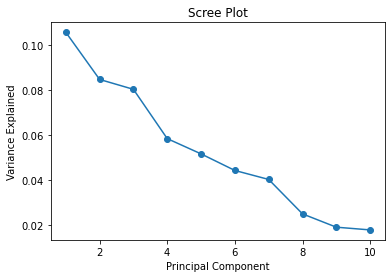

In [15]:
def screePlot(data, n_components=10):
    pca = PCA(n_components=n_components)
    pca_fit = pca.fit(data)
    pca_fit

    PC_values = np.arange(pca.n_components_) + 1
    PC_values

    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')

screePlot(scaled_customers)

In [16]:
scaled_customers.iloc[:,:4]

income       age  years_with_bank  nbr_children
0    0.181399  0.434211         0.555556           0.2
1    0.045818  0.763158         0.111111           0.0
2    0.128665  0.328947         0.888889           0.0
3    0.330667  0.539474         0.333333           0.0
4    0.309066  0.605263         1.000000           0.4
..        ...       ...              ...           ...
742  0.102631  0.302632         0.666667           0.2
743  0.183043  0.565789         0.666667           0.2
744  0.425231  0.486842         0.000000           0.4
745  0.104747  0.315789         0.777778           0.0
746  0.123997  0.065789         0.333333           0.0

[747 rows x 4 columns]

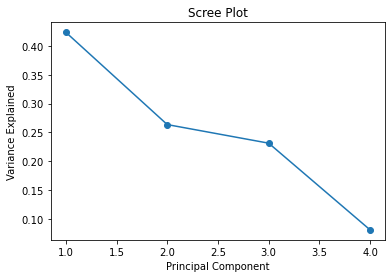

In [17]:
screePlot(scaled_customers.iloc[:,:4], n_components=4)

In [18]:
#export
scaled_customers.to_csv('../data/customers_pca.csv')

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
scaled_customers

income       age  years_with_bank  nbr_children  \
0    0.181399  0.434211         0.555556           0.2   
1    0.045818  0.763158         0.111111           0.0   
2    0.128665  0.328947         0.888889           0.0   
3    0.330667  0.539474         0.333333           0.0   
4    0.309066  0.605263         1.000000           0.4   
5    0.108798  0.526316         0.333333           0.4   
6    0.000000  0.039474         0.111111           0.0   
7    0.013381  0.868421         0.888889           0.0   
8    0.277073  0.368421         0.111111           1.0   
9    0.066747  0.434211         0.666667           0.2   
10   0.179173  0.210526         0.888889           0.0   
11   0.000000  0.026316         0.000000           0.0   
12   0.122242  0.407895         0.111111           0.0   
13   0.061579  0.171053         0.555556           0.0   
14   0.161983  0.500000         0.111111           0.4   
15   0.000000  0.026316         0.000000           0.0   
16   0.072948  0.368421         0.111111           0.2   
17   0.000000  0.052632         0.222222           0.0   
18   0.044077  0.697368         0.666667           0.0   
19   0.145779  0.065789         0.333333           0.0   
20   0.183862  0.486842         0.000000           0.2   
21   0.021907  0.881579         0.000000           0.0   
22   0.464285  0.592105         0.888889           0.0   
23   0.135228  0.434211         0.666667           0.0   
24   0.134118  0.381579         0.222222           0.4   
25   0.045041  0.802632         0.444444           0.0   
26   0.021997  0.118421         0.111111           0.2   
27   0.062265  0.197368         0.777778           0.2   
28   0.212713  0.565789         0.666667           0.2   
29   0.150884  0.671053         0.444444           0.0   
30   0.168747  0.618421         0.000000           0.0   
31   0.527806  0.513158         0.222222           0.2   
32   0.392607  0.236842         0.111111           0.4   
33   0.252017  0.434211         0.666667           0.2   
34   0.277413  0.355263         0.000000           0.0   
35   0.168871  0.250000         0.222222           0.4   
36   0.000000  0.026316         0.777778           0.0   
37   0.150274  0.539474         0.444444           0.2   
38   0.091206  0.460526         0.888889           0.0   
39   0.157398  0.157895         0.444444           0.0   
40   0.069542  0.289474         0.555556           0.0   
41   0.300485  0.223684         0.000000           0.6   
42   0.170266  0.513158         0.222222           0.2   
43   0.125114  0.302632         0.666667           0.4   
44   0.071061  0.513158         0.222222           0.0   
45   0.055571  0.907895         0.222222           0.0   
46   0.169607  0.407895         0.444444           0.2   
47   0.052519  0.131579         0.222222           0.2   
48   0.118614  0.447368         0.777778           0.4   
49   0.326609  0.394737         0.333333           0.2   
50   0.000000  0.000000         0.555556           0.0   
51   0.000000  0.000000         0.555556           0.0   
52   0.416934  0.565789         0.666667           0.4   
53   0.137510  0.552632         0.555556           0.2   
54   0.169787  0.434211         0.666667           0.0   
55   0.169038  0.657895         0.333333           0.0   
56   0.239135  0.513158         0.222222           0.2   
57   0.043702  0.842105         0.777778           0.0   
58   0.357999  0.342105         0.444444           0.0   
59   0.050882  0.197368         0.777778           0.2   
60   0.201614  0.289474         0.555556           0.6   
61   0.000000  0.026316         0.000000           0.0   
62   0.105760  0.210526         0.444444           0.0   
63   0.119606  0.618421         0.000000           0.0   
64   1.000000  0.592105         0.555556           0.0   
65   0.193435  0.276316         0.333333           0.0   
66   0.190709  0.473684         1.000000           0.0   
67   0.040151  0.289474         0.555556           0.4   
68   